## Introducción
### ¿Cuál es el coche más barato pero con las características de mayor valor?

El objetivo de este análisis es simular el proceso de selección de un automóvil a partir de un dataset de vehículos, considerando diferentes variables como precio, tipo de transmisión, combustible, estado, entre otras. El enfoque se plantea desde la perspectiva de que yo mismo asumo el rol de comprador y analista, de modo que cada decisión tomada estará justificada con base en la evidencia que aportan los datos.

## Librerías y ajuste de parámetros

In [ ]:
import sys
sys.path.append('..')

from src.utils import configurar_graficas, track_data_reduction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configurar_graficas()

## Carga de datos

Se cargarán los datos de "carros_parte1.csv" y se inspeccionarán inicialmente para entender su estructura y contenido.

In [6]:
df = pd.read_csv('../Data/carros_parte1.csv', parse_dates=['year_produced'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7881 entries, 0 to 7880
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   manufacturer_name  7881 non-null   object        
 1   model_name         7881 non-null   object        
 2   transmission       7881 non-null   object        
 3   color              7881 non-null   object        
 4   odometer_value     7881 non-null   int64         
 5   year_produced      7881 non-null   datetime64[ns]
 6   engine_fuel        7881 non-null   object        
 7   engine_has_gas     7881 non-null   bool          
 8   engine_type        7881 non-null   object        
 9   engine_capacity    7881 non-null   float64       
 10  body_type          7881 non-null   object        
 11  has_warranty       7881 non-null   bool          
 12  state              7881 non-null   object        
 13  drivetrain         7881 non-null   object        
 14  price_us

### Exploración descriptiva inicial

In [7]:
df.describe(include=np.number)

,odometer_value,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,7881.000000,7881.000000,7881.000000,7881.000000,7881.000000,7881.000000
mean,244605.249841,1.992349,5819.673308,9.550565,16.499683,81.447151
std,125666.030725,0.589191,5499.726435,6.006026,41.924128,116.006125
min,0.000000,0.200000,100.000000,1.000000,1.000000,0.000000
25%,160000.000000,1.600000,2000.000000,5.000000,2.000000,24.000000
50%,246000.000000,1.900000,4200.000000,8.000000,5.000000,60.000000
75%,319000.000000,2.200000,7800.000000,12.000000,17.000000,91.000000
max,1000000.000000,5.900000,50000.000000,61.000000,978.000000,2175.000000


Despues de cargar los datos y realizar una inspección inicial, se puede ver que el dataset contiene 10 columnas y 11914 filas. Las columnas incluyen información relevante sobre los vehículos, como el precio en USD, el fabricante, entre otras. También se observa el promedio de precio de los autos, el valor maximo y minimo, lo que me ayuda a ver el rango de precios y ver el valor máximo que podría gastar en un auto.

## Promedio de precios por marca

En primera instancia, identificaré y calcularé el precio promedio asociado a cada una de las marcas de automoviles presentes en el dataset. Este procedimiento permite obtener una visión general del conjunto de datos y las opciones a escoger en cuanto a las marcas y el precio.

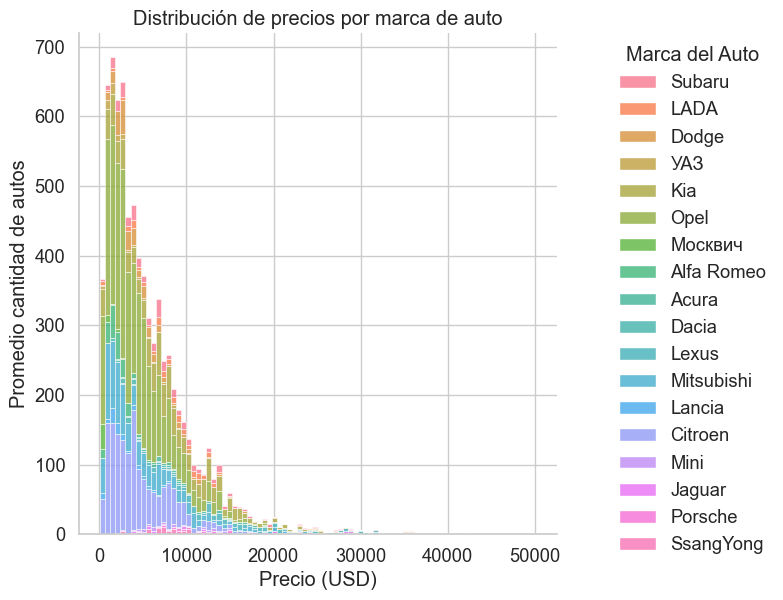

In [8]:
g = sns.displot(df, x='price_usd', hue='manufacturer_name', multiple='stack', height=6)
plt.title('Distribución de precios por marca de auto')
g._legend.set_title('Marca del Auto') 
plt.xlabel('Precio (USD)')
plt.ylabel('Promedio cantidad de autos')
plt.show()

El gráfico refleja que la mayoría de los automóviles se encuentran en un rango de precios inferior a los 20.000 USD. Esto refleja una mayor concentración de vehículos en el segmento económico del mercado, lo que me amplía las posibilidades de adquirir un automóvil usado sin realizar un gasto elevado.

## Análisis de la variable de tiempo 

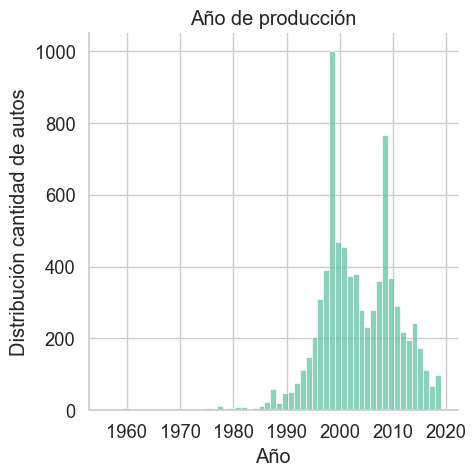

In [9]:
sns.displot(data=df, x='year_produced')
plt.title('Año de producción')
plt.xlabel('Año')
plt.ylabel('Distribución cantidad de autos')

plt.tight_layout()
plt.show()

Se observa una mayor concentración de automóviles a partir del año 1995. Para efectos de la compra, este rango resulta más relevante, ya que refleja vehículos más modernos y con mayor disponibilidad en el mercado de segunda mano, lo que incrementa mis opciones de selección.

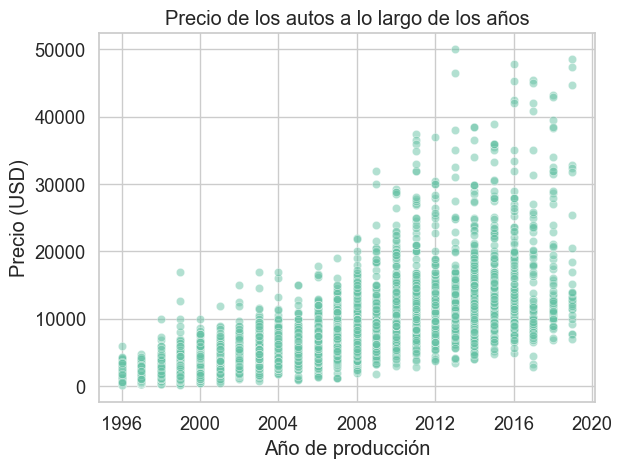

Año de producción posterior a 1995: 7881 -> 7065 filas (816 eliminadas, 10.4% reducción)


In [10]:
df_post_1995 = df[df['year_produced'] > pd.to_datetime('1995-01-01')]

sns.scatterplot(df_post_1995, x='year_produced',y = 'price_usd', alpha=0.5)
plt.title('Precio de los autos a lo largo de los años')
plt.xlabel('Año de producción')
plt.ylabel('Precio (USD)')

plt.show()
track_data_reduction(df, df_post_1995, filter_name='Año de producción posterior a 1995')

In [11]:
#comparación de los años 2008 y 2016
year_2008 = df[df['year_produced'] == pd.to_datetime('2008-01-01')]
year_2016 = df[df['year_produced'] == pd.to_datetime('2016-01-01')]
print(f"Cantidad de autos año 2008: {year_2008.shape}")
print(f"Cantidad de autos año 2016: {year_2016.shape}")

Cantidad de autos año 2008: (466, 20)
Cantidad de autos año 2016: (112, 20)


Se observa que los vehículos fabricados después del año 2008 presentan una mayor variabilidad en los precios, aunque su volumen de registros es reducido en comparación con los automóviles fabricados en años anteriores. Esto bajaría las opciones de obtener un auto mas moderno.

Teniendo en cuenta el análisis realizado, procederé a explorar en mayor detalle las marcas de automóviles con año de fabricación posterior a 2008 en adelante, con el objetivo de identificar patrones relevantes en el mercado de autos usados más recientes.

In [12]:
data_year_2008 = df[df['year_produced'] >= pd.to_datetime('2008-01-01')]
track_data_reduction(df_post_1995, data_year_2008, filter_name='Fabricación de autos 2008 en adelante')
data_year_2008.head()

Fabricación de autos 2008 en adelante: 7065 -> 2536 filas (4529 eliminadas, 64.1% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010-01-01,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.0,False,Минская обл.,9,13,16
5,Subaru,Outback,automatic,silver,132449,2011-01-01,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.0,True,Минская обл.,20,56,67
8,Subaru,Outback,automatic,grey,179000,2010-01-01,gasoline,False,gasoline,2.5,universal,False,owned,all,12900.0,False,Минская обл.,17,33,87
11,Subaru,Tribeca,automatic,grey,256000,2008-01-01,gasoline,False,gasoline,3.6,suv,False,owned,all,8350.0,True,Минская обл.,18,61,80
14,Subaru,Outback,automatic,brown,154685,2011-01-01,gasoline,False,gasoline,2.5,universal,False,owned,all,8600.0,True,Минская обл.,24,34,63


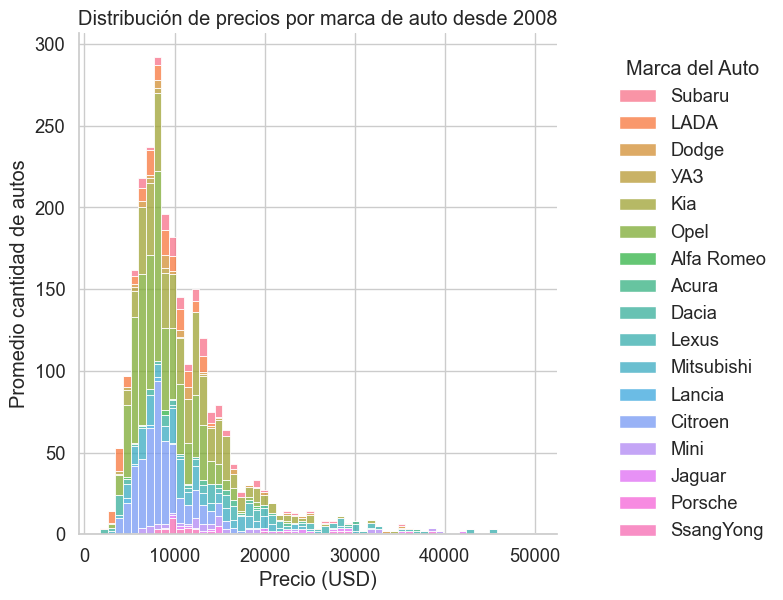

In [13]:
g = sns.displot(data_year_2008, x='price_usd', hue='manufacturer_name', multiple='stack', height=6)
plt.title('Distribución de precios por marca de auto desde 2008')
g._legend.set_title('Marca del Auto')
plt.xlabel('Precio (USD)')
plt.ylabel('Promedio cantidad de autos')

plt.show()

La repetición de esta gráfica permitirá visualizar con mayor claridad los automóviles seleccionados según los parámetros definidos previamente, facilitando un análisis más enfocado en el segmento de interés.

## Análisis de variables categóricas

Empezaremos con la relación que hay entre el precio y algunas características que considero importantes a la hora de comprar un auto.

In [14]:
data_year_2008.select_dtypes(include=object).head()

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain,location_region
0,Subaru,Outback,automatic,silver,gasoline,gasoline,universal,owned,all,Минская обл.
5,Subaru,Outback,automatic,silver,gasoline,gasoline,universal,owned,all,Минская обл.
8,Subaru,Outback,automatic,grey,gasoline,gasoline,universal,owned,all,Минская обл.
11,Subaru,Tribeca,automatic,grey,gasoline,gasoline,suv,owned,all,Минская обл.
14,Subaru,Outback,automatic,brown,gasoline,gasoline,universal,owned,all,Минская обл.


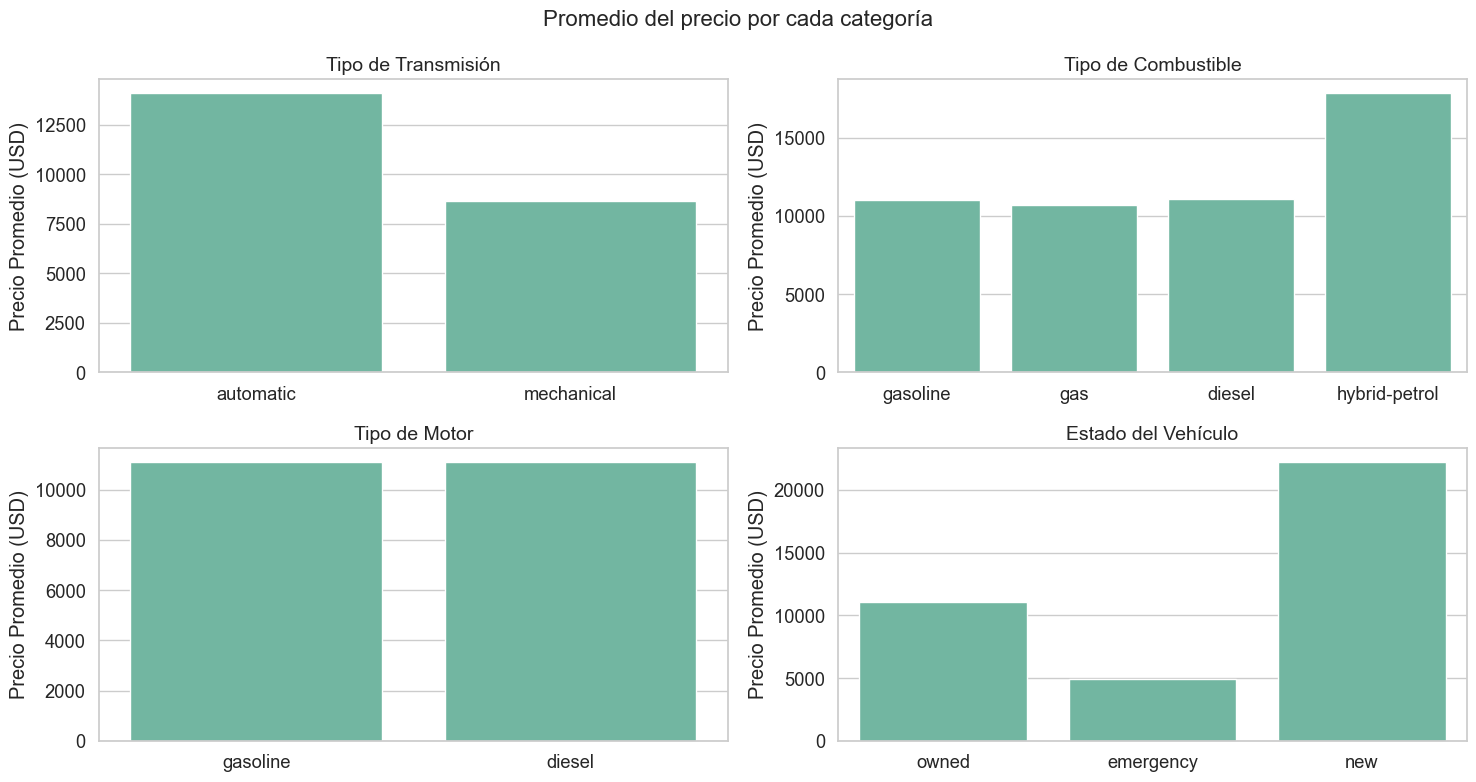

In [15]:
cols_categorical = ['transmission', 'engine_fuel', 'engine_type', 'state'] 

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cols_categorical):
    sns.barplot(data=data_year_2008, x=col, y='price_usd', ax=axes[i], errorbar=None, estimator=np.mean)
    title_map = {
        'transmission': 'Tipo de Transmisión',
        'engine_fuel': 'Tipo de Combustible',
        'engine_type': 'Tipo de Motor',
        'state': 'Estado del Vehículo'
    }
    axes[i].set_title(title_map.get(col, col), fontsize=14)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Precio Promedio (USD)')

sns.set_style('whitegrid')
fig.suptitle('Promedio del precio por cada categoría', fontsize=16)
plt.tight_layout()
plt.show()

Según las gráficas, se evidencian diferencias en el precio promedio de los vehículos según cada categoría. Se observa que los autos con transmisión automática presentan un precio más alto en comparación con los de transmisión mecánica. En cuanto al tipo de combustible, los vehículos híbridos destacan como los más costosos, mientras que los de gas muestra valores más bajos. En relación al tipo de motor, no se aprecian diferencias significativas entre gasolina y diésel. Finalmente, en el estado de los autos, los nuevos tienen un precio mayor que los clasificados como 'emergencia' y 'owned'.

Teniendo en cuenta estas observaciones, el análisis posterior se enfocará en las categorías más costosas y más económicas, con el fin de determinar qué características influyen más en la cantidad de automóviles.

In [16]:
features_expensives = data_year_2008[ (data_year_2008['transmission'] == 'automatic') &
                                      (data_year_2008['engine_fuel'] == 'hybrid-petrol') &
                                      (data_year_2008['engine_type'] == 'gasoline') &
                                      (data_year_2008['state'] == 'new')]
if len(features_expensives) == 0:
    print('No hay datos')

No hay datos


Se hizo la comparación de todas las características mas costosas con los autos de estado 'new', pero al no aparecer ningún auto que tuviera esas especificaciones, decidimos ir por el estado 'owned' ya que es el segundo que mas valor tiene.

In [17]:
category_more_expensive = data_year_2008[(data_year_2008['transmission'] == 'automatic') &
                                        (data_year_2008['engine_fuel'] == 'hybrid-petrol') &
                                        (data_year_2008['engine_type'] == 'gasoline') &
                                        (data_year_2008['state'] == 'owned')]
if len(category_more_expensive) == 0:
        print('No hay datos')
else:
    print('Cantidad de autos con características costosas:',len(category_more_expensive))

category_more_cheap = data_year_2008[(data_year_2008['transmission'] == 'mechanical') &
                                    (data_year_2008['engine_fuel'] == 'gas') &
                                    (data_year_2008['engine_type'] == 'diesel') &
                                    (data_year_2008['state'] == 'emergency')]

if len(category_more_cheap) == 0:
    print('No hay datos')
else:
    print('Cantidad de autos con características baratas:', category_more_cheap.shape)

Cantidad de autos con características costosas: 29
No hay datos


In [18]:
track_data_reduction(data_year_2008, category_more_expensive, filter_name='Características más costosas')
category_more_expensive[['manufacturer_name', 'model_name', 'price_usd']].sort_values(by='model_name')

Características más costosas: 2536 -> 29 filas (2507 eliminadas, 98.9% reducción)


,manufacturer_name,model_name,price_usd
5039,Lexus,CT,14600.0
5015,Lexus,CT,13950.0
4908,Lexus,CT,15200.0
4909,Lexus,CT,15550.0
5007,Lexus,CT,16250.0
4913,Lexus,CT,13899.0
4930,Lexus,CT,13850.0
4949,Lexus,CT,16550.0
4954,Lexus,CT,15600.0
4964,Lexus,CT,18350.0


Se observa que, tras aplicar el filtrado, la cantidad de automóviles disponibles se redujo significativamente. En la categoría de mayor valor, predominan los modelos de la marca **Lexus**, mientras que en la categoría de menor valor prácticamente no se encuentran registros. Esto evidencia que son pocos los autos que cumplen con las características categóricas más costosas, lo cual facilita la reducción del universo de análisis. A partir de este punto, se realizará la revisión de las variables restantes para seleccionar el vehículo que mejor se ajuste a los criterios establecidos.

## Análisis de variables numéricas

A continuación, se realizará el análisis de las variables restantes, lo que representará la última etapa de la búsqueda para identificar el automóvil que mejor se ajuste a mi decisión de compra.

In [19]:
category_more_expensive.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,29.000000,29,29.000000,29.000000,29.000000,29.000000,29.000000
mean,177708.620690,2010-03-17 07:26:53.793103360,2.958621,18121.965517,12.172414,12.724138,73.275862
min,68000.000000,2008-01-01 00:00:00,1.800000,12300.000000,2.000000,1.000000,7.000000
25%,132000.000000,2008-01-01 00:00:00,1.800000,13999.000000,7.000000,3.000000,22.000000
50%,170000.000000,2011-01-01 00:00:00,3.500000,15900.000000,11.000000,7.000000,58.000000
75%,196000.000000,2011-01-01 00:00:00,3.500000,20500.000000,16.000000,19.000000,89.000000
max,370000.000000,2015-01-01 00:00:00,5.000000,38000.000000,28.000000,46.000000,269.000000
std,68232.287182,NaN,0.967145,6033.266146,7.096624,12.302429,68.166234


Text(0, 0.5, 'Precio (USD)')

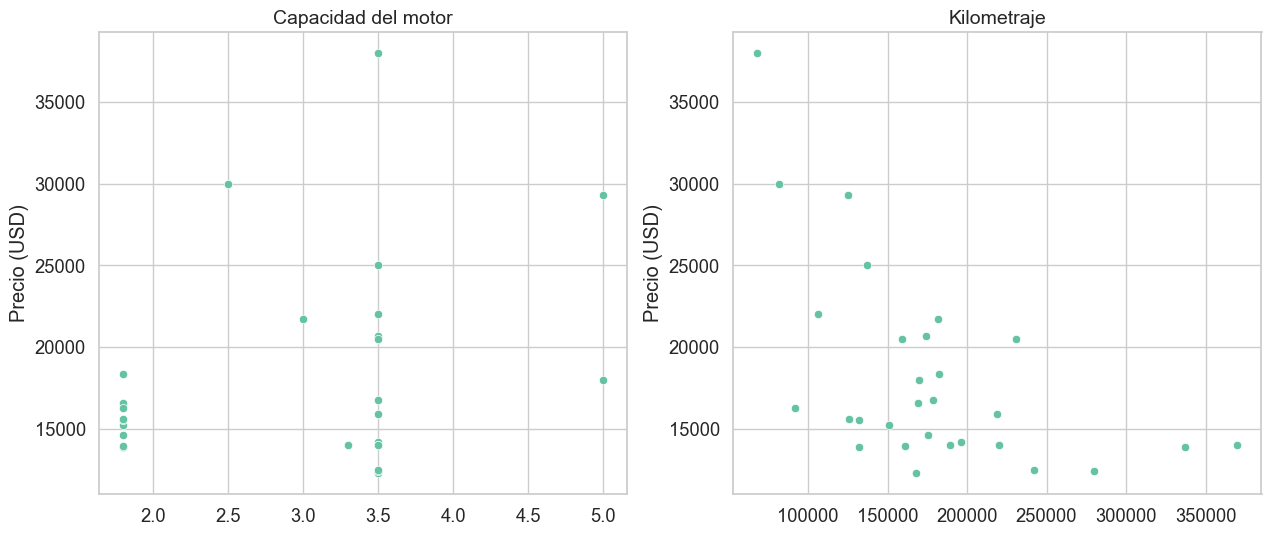

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs = axs.flatten()

sns.scatterplot(data=category_more_expensive, x='engine_capacity', y='price_usd', ax=axs[0])
axs[0].set_title('Capacidad del motor', fontsize=14)
axs[0].set_xlabel(None)
axs[0].set_ylabel('Precio (USD)')

sns.scatterplot(data=category_more_expensive, x='odometer_value', y='price_usd', ax=axs[1])
axs[1].set_title('Kilometraje', fontsize=14)
axs[1].set_xlabel(None)
axs[1].set_ylabel('Precio (USD)')

In [21]:
category_more_expensive[['manufacturer_name', 'model_name', 'engine_capacity', 'odometer_value', 'price_usd']].sort_values('engine_capacity', ascending=True)

,manufacturer_name,model_name,engine_capacity,odometer_value,price_usd
4964,Lexus,CT,1.8,182300,18350.0
5039,Lexus,CT,1.8,175418,14600.0
4908,Lexus,CT,1.8,151000,15200.0
4909,Lexus,CT,1.8,132000,15550.0
5007,Lexus,CT,1.8,92000,16250.0
4913,Lexus,CT,1.8,132000,13899.0
4954,Lexus,CT,1.8,126000,15600.0
5015,Lexus,CT,1.8,160934,13950.0
4930,Lexus,CT,1.8,337000,13850.0
4949,Lexus,CT,1.8,168981,16550.0


In [22]:
category_more_expensive['engine_capacity'].mean()

2.9586206896551723

Los datos y la gráfica muestran que, hay variabilidad en la capacidad del motor, pero como se desea un motor de alta capacidad, se filtrarán los autos con un motor mayor a 2.9 ya que es la capacidad promedio de los autos mostrados en la tabla. tambien, vemos variabilidad en el kilometraje, por lo que, dependiendo el filtrado que nos dé el motor, se verá el auto con mejor kilometraje y en base a eso, se seleccionara el auto que se ha estado buscando en esta investigación.

In [23]:
more_engine_capacity = (category_more_expensive[category_more_expensive['engine_capacity'] > 2.9]
                        .sort_values('engine_capacity', ascending=False))
track_data_reduction(category_more_expensive, more_engine_capacity, filter_name='Características costosas y alta capacidad del motor')
more_engine_capacity.head(5)

Características costosas y alta capacidad del motor: 29 -> 18 filas (11 eliminadas, 37.9% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
5076,Lexus,LS,automatic,black,170000,2008-01-01,hybrid-petrol,False,gasoline,5.0,sedan,False,owned,all,18000.0,True,Могилевская обл.,12,46,240
5058,Lexus,LS,automatic,black,125000,2010-01-01,hybrid-petrol,False,gasoline,5.0,sedan,False,owned,all,29300.0,True,Гомельская обл.,2,1,78
4870,Lexus,RX,automatic,black,230973,2009-01-01,hybrid-petrol,False,gasoline,3.5,suv,False,owned,all,20500.0,True,Минская обл.,16,18,29
4879,Lexus,GS,automatic,silver,196000,2008-01-01,hybrid-petrol,False,gasoline,3.5,sedan,False,owned,rear,14200.0,True,Минская обл.,19,42,84
5056,Lexus,RX,automatic,black,136794,2011-01-01,hybrid-petrol,False,gasoline,3.5,suv,False,owned,all,25000.0,False,Минская обл.,16,7,91


Aquí vemos los 5 autos con mejor capacidad del motor y hay dos con una capacidad de 5.0 lo cual es una capacidad muy buena en comparación con las demás. Teniendo en cuenta esto, filtraremos estos dos autos y compararemos sus especificaciones para ver cual auto escogeremos.

In [24]:
lexus_ls = more_engine_capacity[(more_engine_capacity['manufacturer_name'] == 'Lexus') & (more_engine_capacity['model_name'] == 'LS')]
track_data_reduction(more_engine_capacity, lexus_ls, filter_name='Marca Lexus LS con alta capacidad de motor')
lexus_ls

Marca Lexus LS con alta capacidad de motor: 18 -> 2 filas (16 eliminadas, 88.9% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
5076,Lexus,LS,automatic,black,170000,2008-01-01,hybrid-petrol,False,gasoline,5.0,sedan,False,owned,all,18000.0,True,Могилевская обл.,12,46,240
5058,Lexus,LS,automatic,black,125000,2010-01-01,hybrid-petrol,False,gasoline,5.0,sedan,False,owned,all,29300.0,True,Гомельская обл.,2,1,78


## Conclusión

Con esta última investigación se evidencia que el primer vehículo presenta un mayor kilometraje y un año de producción más antiguo, lo cual no resulta ideal al tratarse de un auto más usado y viejo. Sin embargo, al comparar los precios entre ambos, el segundo automóvil tiene un valor significativamente más elevado.

Por lo tanto, como conclusión final, se selecciona el primer Lexus LS, ya que, a pesar de ser más usado y de contar con un modelo más antiguo, su precio resulta considerablemente más bajo en relación con las características ofrecidas, siendo la opción más conveniente dentro de los autos analizados. 